In [27]:
import pandas as pd

In [28]:
df = pd.read_csv('co2.csv', delimiter=";", index_col=0)
df = df[df.index >= "1950"]
df.index = pd.to_datetime(df.index, format="%Y-%m-%d")
df.head()

,data_mean_global,data_mean_nh,data_mean_sh
date,,,
1950-01-15,313.597898,314.751334,312.444461
1950-02-15,313.968034,315.402500,312.533568
1950-03-15,314.274349,315.997671,312.551026
1950-04-15,314.468454,316.441488,312.495420
1950-05-15,314.310746,316.134174,312.487318


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 780 entries, 1950-01-15 to 2014-12-15
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   data_mean_global  780 non-null    float64
 1   data_mean_nh      780 non-null    float64
 2   data_mean_sh      780 non-null    float64
dtypes: float64(3)
memory usage: 24.4 KB


In [30]:
annual_mean = df.groupby(df.index.year).mean()

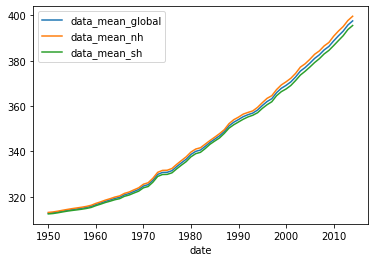

In [31]:
annual_mean.plot()

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

In [33]:
monthly_df = df
nh_df = pd.DataFrame(df['data_mean_nh'])
nh_df['geo'] = "data_mean_nh"
nh_df.columns = ['value', 'geo']
gl_df = pd.DataFrame(df['data_mean_global'])
gl_df['geo'] = "data_mean_global"
gl_df.columns = ['value', 'geo']
sh_df = pd.DataFrame(df['data_mean_sh'])
sh_df['geo'] = "data_mean_sh"
sh_df.columns = ['value', 'geo']
monthly_df = pd.concat([nh_df, gl_df, sh_df])
monthly_df['month'] = monthly_df.index.strftime('%b')

<bound method Artist.set of <matplotlib.axes._subplots.AxesSubplot object at 0x7f887e4a0a00>>

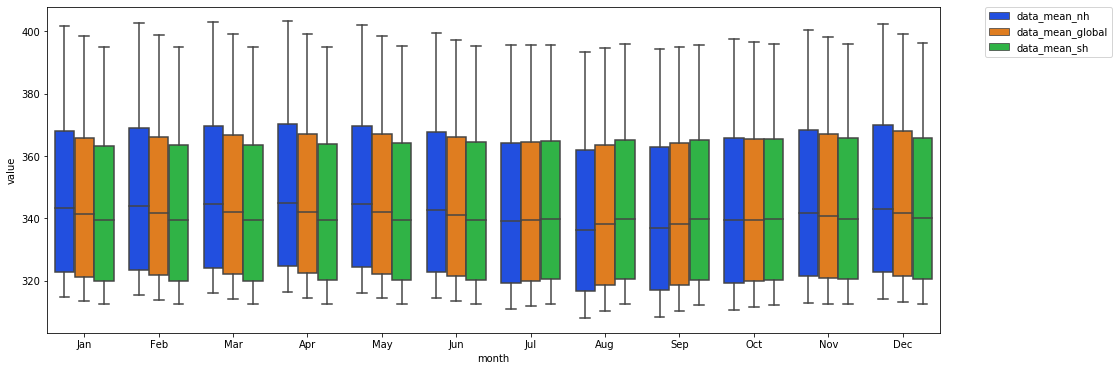

In [58]:
plt.figure(figsize=(16, 6))
ax = sns.boxplot(
    x='month',y='value',hue='geo', data=monthly_df,
    palette="bright")
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
ax.set

In [10]:
monthly_df['geo'].unique()

array(['data_mean_nh', 'data_mean_global', 'data_mean_sh'], dtype=object)

In [11]:
monthly_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2340 entries, 1950-01-15 to 2014-12-15
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   value             780 non-null    float64
 1   geo               2340 non-null   object 
 2   data_mean_global  780 non-null    float64
 3   data_mean_sh      780 non-null    float64
 4   month             2340 non-null   object 
dtypes: float64(3), object(2)
memory usage: 189.7+ KB


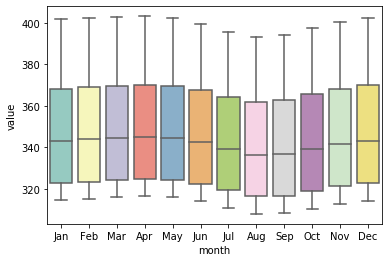

In [13]:
sns.boxplot(x='month',y='value', data=monthly_df.loc[monthly_df['geo'] == 'data_mean_nh'], palette="Set3")

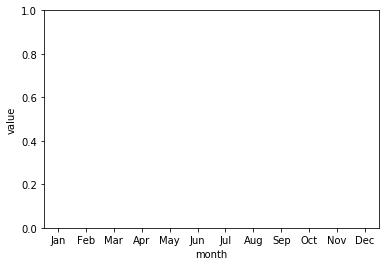

In [14]:
sns.boxplot(x='month',y='value', data=monthly_df.loc[monthly_df['geo'] == 'data_mean_sh'], palette="Set3")

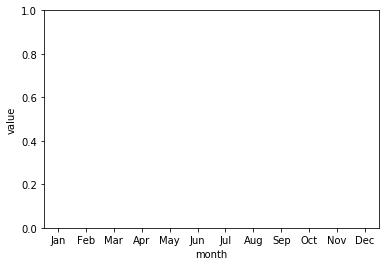

In [15]:
sns.boxplot(x='month',y='value', data=monthly_df.loc[monthly_df['geo'] == 'data_mean_global'], palette="Set3")

In [21]:
!pip freeze

attrs==19.3.0
backcall==0.1.0
bleach==3.1.1
cycler==0.10.0
decorator==4.4.2
defusedxml==0.6.0
entrypoints==0.3
ipykernel==5.1.4
ipython==7.13.0
ipython-genutils==0.2.0
jedi==0.16.0
Jinja2==2.11.1
json5==0.9.2
jsonschema==3.2.0
jupyter-client==6.0.0
jupyter-core==4.6.3
jupyterlab==2.0.0
jupyterlab-server==1.0.6
kiwisolver==1.1.0
MarkupSafe==1.1.1
matplotlib==3.1.3
mistune==0.8.4
nbconvert==5.6.1
nbformat==5.0.4
notebook==6.0.3
numpy==1.18.1
pandas==1.0.1
pandocfilters==1.4.2
parso==0.6.2
pexpect==4.8.0
pickleshare==0.7.5
prometheus-client==0.7.1
prompt-toolkit==3.0.3
ptyprocess==0.6.0
Pygments==2.5.2
pyparsing==2.4.6
pyrsistent==0.15.7
python-dateutil==2.8.1
pytz==2019.3
pyzmq==19.0.0
scipy==1.4.1
seaborn==0.10.0
Send2Trash==1.5.0
six==1.14.0
terminado==0.8.3
testpath==0.4.4
tornado==6.0.3
traitlets==4.3.3
wcwidth==0.1.8
webencodings==0.5.1
